In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import evol_dynamics

In [3]:
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

import itertools

import pandas as pd
import dask.dataframe as dd
import numpy as np

In [35]:
import tqdm

**Measures to understand the population**

- cooperating ratio between the fixed residents?
- number of fixed mutants
- time until the first fixed mutant
- time until the first fixed mutant for other initial residents

**Up to five opponents and interactions**

In [5]:
import glob

def read_data_sets(path, num_opponents, resident):


    
    files = glob.glob(f"data/simulations_up_to_five/*{resident}.csv")

    dfs = [pd.read_csv(file, header=None) for file in files]

    df = pd.concat(dfs)
    df.columns = columns
    
    data = df[['$y_1$', '$p_1$', '$q_1$']].values

    cooperation_rates = [get_cooperation_rate(row, delta=0.999) for row in data]
    df['cooperation rate'] = cooperation_rates
    
    return df

In [6]:
def get_cooperation_rate(player, delta):
    state = evol_dynamics.expected_distribution_last_round(player, player, delta)
    
    return state[0] +  state[1]

**ALLD is the resident**

In [28]:
files = glob.glob(f"data/simulations_up_to_five/*GTFT.csv")

In [29]:
dfs = [pd.read_csv(file, header=None) for file in files]

In [30]:
df = pd.concat(dfs)

In [36]:
df.head()

,timestep,$y_1$,$p_1$,$q_1$,$y_2$,$p_2$,$q_2$,resident count,mutant count,num of interactions,num of opponents,N,delta,strength_of_selection
0,1,0.333333,0.333333,0.333333,0.548814,0.715189,0.602763,98,2,5,4,100,0.999,1
1,2,0.333333,0.333333,0.333333,0.548814,0.715189,0.602763,97,3,5,4,100,0.999,1
2,3,0.333333,0.333333,0.333333,0.548814,0.715189,0.602763,96,4,5,4,100,0.999,1
3,4,0.333333,0.333333,0.333333,0.548814,0.715189,0.602763,97,3,5,4,100,0.999,1
4,5,0.333333,0.333333,0.333333,0.548814,0.715189,0.602763,96,4,5,4,100,0.999,1


In [37]:
df.tail()

,timestep,$y_1$,$p_1$,$q_1$,$y_2$,$p_2$,$q_2$,resident count,mutant count,num of interactions,num of opponents,N,delta,strength_of_selection
4190129,4204672,0.587366,0.505799,0.696516,0.926205,0.564532,0.001327,37,63,4,2,100,0.999,1
4190130,4204673,0.587366,0.505799,0.696516,0.926205,0.564532,0.001327,36,64,4,2,100,0.999,1
4190131,4204674,0.587366,0.505799,0.696516,0.926205,0.564532,0.001327,37,63,4,2,100,0.999,1
4190132,4204675,0.587366,0.505799,0.696516,0.926205,0.564532,0.001327,38,62,4,2,100,0.999,1
4190133,4204676,0.587366,0.505799,0.696516,0.926205,0.564532,0.001327,39,61,4,2,100,0.999,1


In [33]:
columns = [
    "timestep",
    "$y_1$",
    "$p_1$",
    "$q_1$",
    "$y_2$",
    "$p_2$",
    "$q_2$",
    "resident count",
    "mutant count",
    "num of interactions",
    "num of opponents",
    "N",
    "delta",
    "strength_of_selection",
]

In [34]:
df.columns = columns

In [39]:
lenght = df.size

In [46]:
%%time 

df['cooperation rate'] = df.apply(lambda row: get_cooperation_rate((row['$y_1$'], 
                                                                    row['$p_1$'],
                                                                    row['$q_1$']),
                                                                    row['delta']), axis=1)

CPU times: user 1h 2min 37s, sys: 1min 1s, total: 1h 3min 39s
Wall time: 1h 4min 2s


In [25]:
df.head()

,timestep,$y_1$,$p_1$,$q_1$,$y_2$,$p_2$,$q_2$,resident count,mutant count,num of interactions,num of opponents,N,delta,strength_of_selection,cooperation rate
0,1,0.0,0.0,0.0,0.548814,0.715189,0.602763,100,0,5,3,100,0.999,1,0.0
1,3,0.0,0.0,0.0,0.071036,0.087129,0.020218,100,0,5,3,100,0.999,1,0.0
2,5,0.0,0.0,0.0,0.521848,0.414662,0.264556,100,0,5,3,100,0.999,1,0.0
3,7,0.0,0.0,0.0,0.060225,0.666767,0.670638,100,0,5,3,100,0.999,1,0.0
4,9,0.0,0.0,0.0,0.414369,0.474698,0.623510,100,0,5,3,100,0.999,1,0.0


In [47]:
df.to_csv('data/multi_interactions_with_GTFT.csv')

In [27]:
ALLDs = df

In [48]:
GTFT = df

In [54]:
alld = ALLDs[ALLDs["resident count"] == 100]

In [55]:
gtft = GTFT[GTFT["resident count"] == 100]

# Analysis

In [59]:
alld_groups = alld.groupby('num of opponents')

In [62]:
alld.groupby(['num of opponents', 'num of interactions'])[['$y_1$', '$p_1$', '$q_1$']].nunique()['$y_1$'].unstack()

num of interactions,1,2,3,4,5
num of opponents,,,,,
1,984,627,613,190,596
2,393,109,218,121,452
3,274,194,136,223,227
4,246,127,153,128,184
5,221,154,112,177,195


In [67]:
table = alld.groupby(['num of opponents', 'num of interactions'])['cooperation rate'].mean().unstack()

table

num of interactions,1,2,3,4,5
num of opponents,,,,,
1,0.193765,0.356876,0.240637,0.241197,0.309883
2,0.240524,0.292405,0.429590,0.242071,0.271694
3,0.335569,0.429060,0.277462,0.279583,0.312815
4,0.195615,0.214159,0.222366,0.349499,0.329535
5,0.365410,0.488038,0.371692,0.348224,0.379429


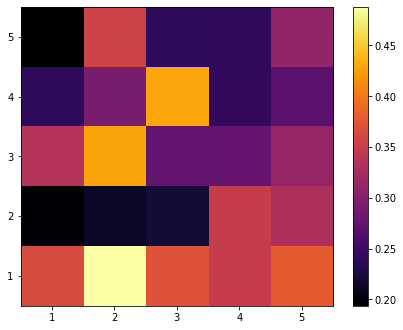

In [71]:
fig = plt.subplots(figsize=(7, 5.5))

plt.imshow(table.values, interpolation='nearest', aspect='auto', cmap='inferno')

plt.colorbar()

plt.xticks(np.arange(5), ("1", '2', '3', '4', '5',));
plt.yticks(np.arange(5), ('5', '4', '3', '2', "1"));

In [72]:
groups = alld.groupby(['num of opponents', 'num of interactions'])[['$p_1$', '$q_1$']]

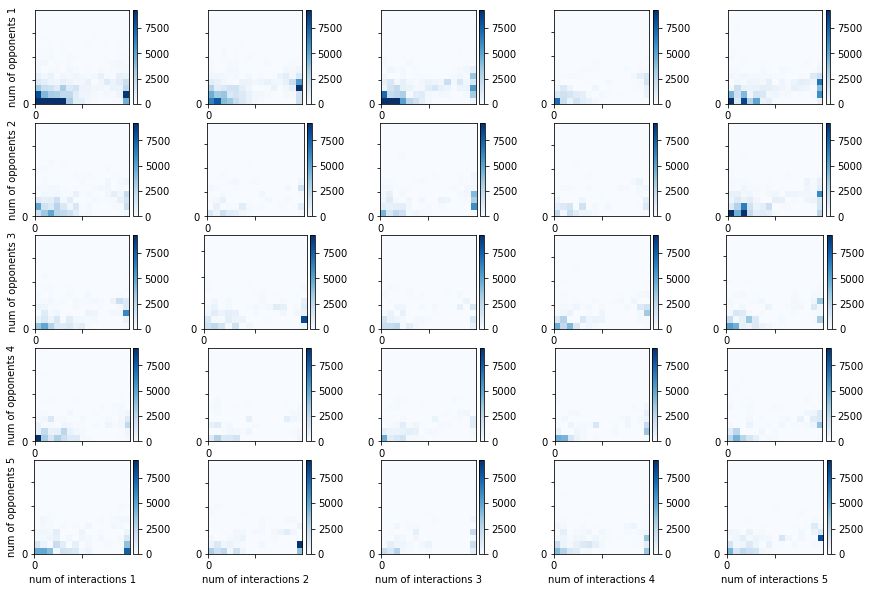

In [115]:
cmap = matplotlib.cm.get_cmap("Blues")
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 10))

# maxs = [max(values) for values in all_maxs]

for i, group in groups:
    i = (i[0] - 1, i[1] - 1)
    x, y = zip(*group[['$p_1$', '$q_1$']].values)


    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = ax[i].imshow(heatmap.T, cmap=cmap, extent=extent, origin="lower", vmax=9262.0)

    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax[i].set_xticklabels(["0"] + ["" for _ in range(7)] + ["1"])
    ax[i].set_yticklabels(["0"] + ["" for _ in range(7)] + ["1"])


for i in range(5):
    plt.setp(ax[-1, i], xlabel=f"num of interactions {i + 1}");
    plt.setp(ax[i, 0], ylabel=f"num of opponents {i + 1}");

**GTFT**

In [78]:
gtft.groupby(['num of opponents', 'num of interactions'])[['$y_1$', '$p_1$', '$q_1$']].nunique()['$y_1$'].unstack()

num of interactions,1,2,3,4,5
num of opponents,,,,,
1,275,600,721,825,600
2,504,180,293,109,379
3,351,280,72,109,161
4,252,39,206,106,70
5,3,269,13,114,154


In [79]:
table = gtft.groupby(['num of opponents', 'num of interactions'])['cooperation rate'].mean().unstack()

table

num of interactions,1,2,3,4,5
num of opponents,,,,,
1,0.242271,0.338444,0.395612,0.332977,0.353017
2,0.209049,0.394557,0.397965,0.213362,0.397472
3,0.298027,0.358387,0.172155,0.260922,0.397044
4,0.238748,0.424426,0.341618,0.226941,0.341570
5,0.128970,0.240837,0.245523,0.557083,0.362194


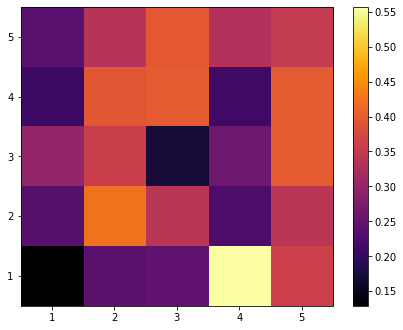

In [80]:
fig = plt.subplots(figsize=(7, 5.5))

plt.imshow(table.values, interpolation='nearest', aspect='auto', cmap='inferno')

plt.colorbar()

plt.xticks(np.arange(5), ("1", '2', '3', '4', '5',));
plt.yticks(np.arange(5), ('5', '4', '3', '2', "1"));

In [116]:
groups = gtft.groupby(['num of opponents', 'num of interactions'])[['$p_1$', '$q_1$']]

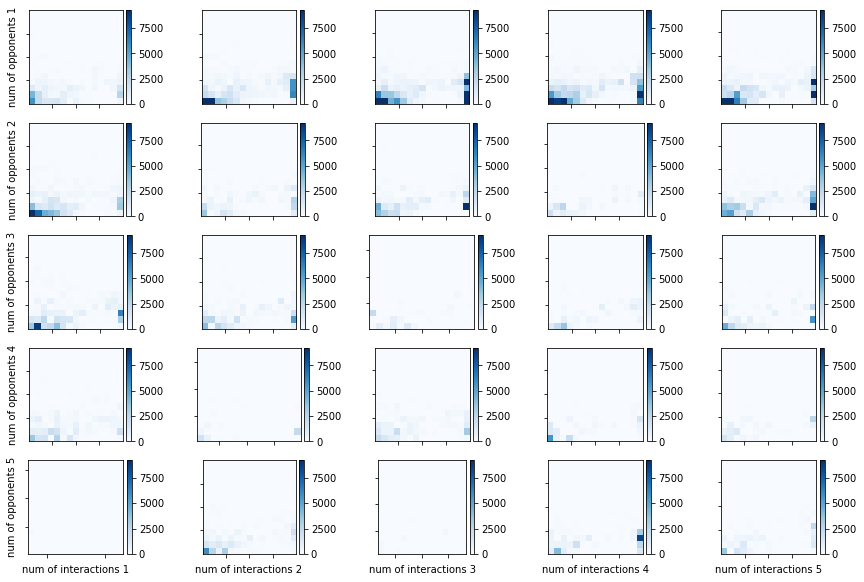

In [117]:
cmap = matplotlib.cm.get_cmap("Blues")
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 10))

# maxs = [max(values) for values in all_maxs]

for i, group in groups:
    i = (i[0] - 1, i[1] - 1)
    x, y = zip(*group[['$p_1$', '$q_1$']].values)


    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = ax[i].imshow(heatmap.T, cmap=cmap, extent=extent, origin="lower", vmax=9262.0)

    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax[i].set_xticklabels(["0"] + ["" for _ in range(7)] + ["1"])
    ax[i].set_yticklabels(["0"] + ["" for _ in range(7)] + ["1"])


for i in range(5):
    plt.setp(ax[-1, i], xlabel=f"num of interactions {i + 1}");
    plt.setp(ax[i, 0], ylabel=f"num of opponents {i + 1}");